<class 'numpy.ndarray'>


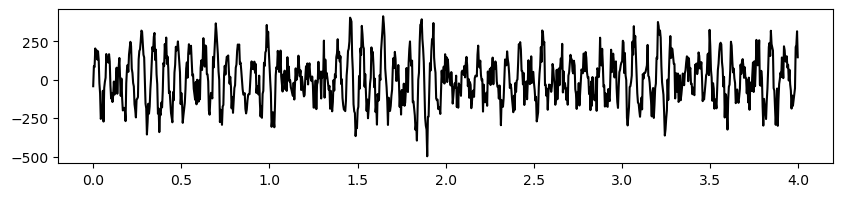

In [1]:
import emd
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage,signal
import pandas as pd


# Define and simulate a simple signal
peak_freq = 15
sample_rate = 256
seconds = 10
noise_std = .4
x = emd.simulate.ar_oscillator(peak_freq, sample_rate, seconds,
                               noise_std=noise_std, random_seed=42, r=.96)[:, 0]
print(type(x))
t = np.linspace(0, seconds, seconds*sample_rate)

# Plot the first 5 seconds of data
plt.figure(figsize=(10, 2))
plt.plot(t[:sample_rate*4], x[:sample_rate*4], 'k')


def truncate(x, size = 900):
    return x[size:-size]
# sphinx_gallery_thumbnail_number = 5

In [38]:
training_data = pd.read_csv('X_train.csv')
test_data = pd.read_csv('X_test.csv')
training_labels = pd.read_csv('y_train.csv')

In [43]:
feature=training_data.iloc[:,1:2459].dropna(axis=1).to_numpy()
training_arrays = []
for row in range(len(test_data)):
    training_arrays.append(test_data.iloc[row,1:].values[~np.isnan(test_data.iloc[row,1:])])

In [44]:
x = training_arrays[120]
x.shape

(7820,)

In [39]:
def ims_freqs_hist(x):
    imf,arr = emd.sift.mask_sift(x, max_imfs=8,ret_mask_freq=True)
    IP, IF, IA = emd.spectra.frequency_transform(imf, 300, 'nht')
    
    hist,bin_edges = np.histogram(IF[:,2], np.linspace(0,20), weights=IA[:,2])
    return hist
print(ims_freqs(x))

[3.01365167e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.96215695e+01 2.27024036e+03 2.86581306e+04 1.87823913e+05
 3.51684699e+05 1.00370123e+05 1.73924344e+04 7.47580156e+02
 7.03489496e+02 1.25254429e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [40]:
def ims_freqs(x):
    imf,arr = emd.sift.mask_sift(x, max_imfs=8,ret_mask_freq=True)
    return arr
print(ims_freqs(x))

[0.04745135 0.02372568 0.01186284 0.00593142 0.00296571 0.00148285
 0.00074143 0.00037071]


In [47]:
mask_freqs = []
a = 0
for X in training_arrays:
        data = truncate(X)
        freqs = ims_freqs_hist(data)
        mask_freqs.append(freqs)
        print(a/len(training_arrays))
        a+=1

0.0
0.0002931691586045148
0.0005863383172090296
0.0008795074758135445
0.0011726766344180592
0.001465845793022574
0.001759014951627089
0.0020521841102316037
0.0023453532688361184
0.002638522427440633
0.002931691586045148
0.0032248607446496626
0.003518029903254178
0.0038111990618586926
0.004104368220463207
0.0043975373790677225
0.004690706537672237
0.004983875696276752
0.005277044854881266
0.0055702140134857815
0.005863383172090296
0.006156552330694811
0.006449721489299325
0.0067428906479038405
0.007036059806508356
0.00732922896511287
0.007622398123717385
0.0079155672823219
0.008208736440926415
0.008501905599530929
0.008795074758135445
0.00908824391673996
0.009381413075344474
0.009674582233948988
0.009967751392553504
0.010260920551158018
0.010554089709762533
0.010847258868367049
0.011140428026971563
0.011433597185576077
0.011726766344180592
0.012019935502785108
0.012313104661389622
0.012606273819994136
0.01289944297859865
0.013192612137203167
0.013485781295807681
0.013778950454412195
0.0

In [48]:
df = pd.DataFrame(mask_freqs)
df.to_csv('hist_emd_test.csv')

In [102]:
spectograms = []
i = 0
for ts in training_arrays:
    ts = ts[400:2000]
    f, t, Sxx = signal.spectrogram(ts,fs=300)
    fl = Sxx.flatten()
    assert len(fl) == 7*129
    spectograms.append(fl)
    print(i/len(training_arrays))
    i+=1


0.0
0.00019542700801250732
0.00039085401602501464
0.000586281024037522
0.0007817080320500293
0.0009771350400625367
0.001172562048075044
0.0013679890560875513
0.0015634160641000586
0.0017588430721125659
0.0019542700801250734
0.0021496970881375805
0.002345124096150088
0.0025405511041625955
0.0027359781121751026
0.00293140512018761
0.003126832128200117
0.0033222591362126247
0.0035176861442251317
0.0037131131522376393
0.003908540160250147
0.004103967168262654
0.004299394176275161
0.004494821184287669
0.004690248192300176
0.004885675200312683
0.005081102208325191
0.005276529216337698
0.005471956224350205
0.005667383232362712
0.00586281024037522
0.006058237248387727
0.006253664256400234
0.006449091264412742
0.006644518272425249
0.006839945280437756
0.0070353722884502635
0.007230799296462771
0.0074262263044752785
0.007621653312487786
0.007817080320500294
0.0080125073285128
0.008207934336525308
0.008403361344537815
0.008598788352550322
0.008794215360562829
0.008989642368575338
0.00918506937658

In [113]:
i = 0
for ts in training_arrays:
    ts = ts[400:2000]
    f, t, Sxx = signal.spectrogram(ts,fs=300)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.axis('off')
    path = 'spectograms/spectogram{}.png'.format(i)
    plt.savefig(path)
    i+=1




In [103]:
spectograms = np.array(spectograms)
len(spectograms)

5117

In [104]:
df = pd.DataFrame(spectograms)
df.to_csv('spectograms_train.csv')